In [1]:
from sklearn.utils import shuffle
import torch.nn as nn
import torch.utils as utils
import numpy as np
import data, network, torch, pickle, time, os
from trainNetwork import *
from torch_geometric.loader import DataLoader as batchLoader
from absl import app,flags

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
b = sys.argv
b[1] = ''
FLAGS(b)

['/home/julian/miniconda3/envs/trial/lib/python3.12/site-packages/ipykernel_launcher.py',
 '',
 '/home/julian/.local/share/jupyter/runtime/kernel-2768fb3b-5adf-4d4f-8ee2-89914707f04a.json']

In [3]:
if FLAGS.device == 'CPU':
    device = torch.device("cpu")
if FLAGS.device == 'GPU':
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
    else:
        device = torch.device("cpu")
        print ("GPU not available, using CPU instead.")
#----------------------------- Set up network parameters -----------------------------#
## raw data feature : [HWFlag,Tmax,Tref,Tavg,Tmin,Tdew,Wind,Prcp,PA,Psea,DOY,ONI,StatLon,StatLat]
featureIdx = np.arange(0,14)
iDim = FLAGS.Cin*len(featureIdx) if FLAGS.nHistYear == 0 else len(featureIdx)*((FLAGS.Cin+FLAGS.Cout)*FLAGS.nHistYear+FLAGS.Cin)
# Select model based on # of layers
if FLAGS.nGAT>0 and FLAGS.nConv>0:
    _model = 'Hybrid'
elif FLAGS.nGAT>0 and FLAGS.nConv==0:
    _model = 'GAT'
elif FLAGS.nConv>0 and FLAGS.nGAT==0:
    _model = 'GNN'
else:
    _model = None
    print("Model NOT recognized!")
modelPara = {
    'nMLP':     FLAGS.nMLP,
    'nConv':    FLAGS.nConv,
    'nGAT':     FLAGS.nGAT,
    'nHeads':   FLAGS.nHeads,
    'iDim':     iDim,
    'oDim':     FLAGS.Cout,
    'BN':       FLAGS.BN,
    'Dropout':  FLAGS.Dropout,
    'HLD':      FLAGS.HLD,
    'AF':       FLAGS.AF,
    'K':        FLAGS.K,
    'model':    _model,
}
paraDict = {
'device':           device,
'Cin':              FLAGS.Cin,
'Cout':             FLAGS.Cout,
'selfConn':         FLAGS.selfConn,
'scaledWeights':    FLAGS.scaledWeights,
'norm':             FLAGS.norm,
'Tdiff':            FLAGS.Tdiff,
'nHistYear':        FLAGS.nHistYear,
'featureIdx':       featureIdx,
'graphCorrIdx':     FLAGS.graphCorrIdx,
'thres':            FLAGS.thres,
}

GPU not available, using CPU instead.


In [4]:
metadata = None
FTG = data.FTGenerator(paraDict,metadata)
Dataset, metadata = FTG.createDataset()

(5473, 91, 56)


In [5]:
len(Dataset)

5473

In [52]:
for i in range(len(Dataset)):
    if i%10==0:
        print(Dataset[i].x[:,-1])

tensor([-0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000, -0.8500000,
        -0.8500000, -0.8500000, -0.85000

In [6]:
_df = pd.read_table("ONI.txt", header = 1, sep=r"\s+")
_df["ONI"]

_data = data.loadONI("ONI.txt")

5479

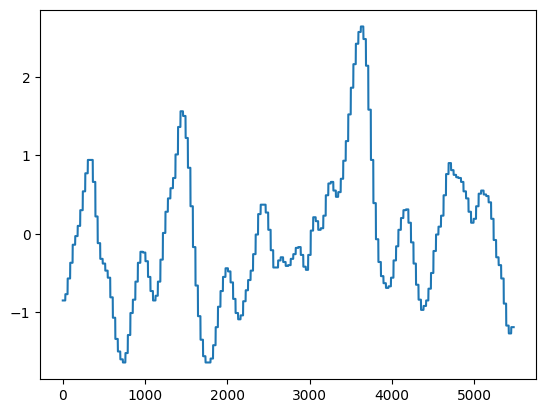

In [8]:
plt.plot(_data)
len(_data)